# Handwritten Digit Recognition

In this Jupyter notebook, I'll build a machine learning model to classify the images of handwritten digits to their corresponding numbers from 0 to 9

I'll use the MNIST dataset for this purpose

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Fetching and Visualizing the Data

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
X = mnist.data
y = mnist.target

In [5]:
X.shape

(70000, 784)

Let us split the train_set and test_set and keep it aside

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.15, random_state = 42)
for train_index,test_index in split.split(X,y):
    train_data = X[train_index]
    test_data = X[test_index]
    train_label = y[train_index]
    test_label = y[test_index]

Let us visualize 100 images from training set

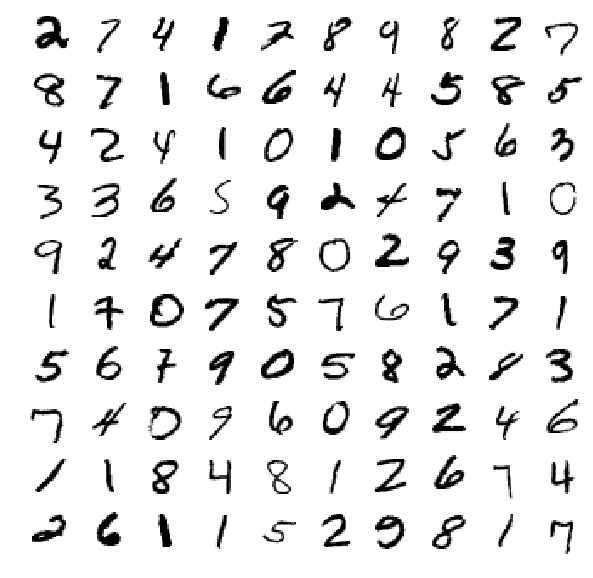

In [8]:
num = 0
fig,ax = plt.subplots(nrows = 10, ncols = 10, figsize = (10,10))
for row in ax:
    for col in row:
        col.imshow(train_data[num].reshape((28,28)), cmap = plt.cm.binary, interpolation = 'nearest')
        num += 1
        col.axis('off')

From the above figure we can see handwritten digits which are a small part of training set

# Preparing Data for Classification Algoritms

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data)

# Choosing Best Model

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score

# SGD Classifier

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
sgd_clf = SGDClassifier(max_iter = 50)
y_train_pred = cross_val_predict(sgd_clf,scaled_train_data,train_label,cv = 3)
accuracy = sum(train_label == y_train_pred)/len(train_label)
micro_precision = precision_score(train_label,y_train_pred, average = 'micro')
micro_recall = recall_score(train_label,y_train_pred, average = 'micro')
micro_f1_score = f1_score(train_label, y_train_pred, average = 'micro')
print('Micro_Precision =', micro_precision,'\nMicro_Recall =',micro_recall, '\nMicro_F1_Score =', micro_f1_score)
print('Accuracy Scores',accuracy)

Micro_Precision = 0.9114621848739496 
Micro_Recall = 0.9114621848739496 
Micro_F1_Score = 0.9114621848739495
Accuracy Scores 0.9114621848739496


# RandomForestClassifier

In [14]:
clf_forest = RandomForestClassifier(n_estimators = 10)
y_train_pred = cross_val_predict(clf_forest,scaled_train_data,train_label,cv = 3)
accuracy = sum(train_label == y_train_pred)/len(train_data)
micro_precision = precision_score(train_label,y_train_pred, average = 'micro')
micro_recall = recall_score(train_label,y_train_pred, average = 'micro')
micro_f1_score = f1_score(train_label, y_train_pred, average = 'micro')
print('Micro_Precision =', micro_precision,'\nMicro_Recall =',micro_recall, '\nMicro_F1_Score =', micro_f1_score)
print('Accuracy Scores',accuracy)

Micro_Precision = 0.9401512605042017 
Micro_Recall = 0.9401512605042017 
Micro_F1_Score = 0.9401512605042017
Accuracy Scores 0.9401512605042017


# Neural Network Classifier

In [15]:
neural_net = MLPClassifier()
y_train_pred = cross_val_predict(neural_net,scaled_train_data,train_label,cv = 3)
accuracy = sum(train_label == y_train_pred)/len(train_data)
micro_precision = precision_score(train_label,y_train_pred, average = 'micro')
micro_recall = recall_score(train_label,y_train_pred, average = 'micro')
micro_f1_score = f1_score(train_label, y_train_pred, average = 'micro')
print('Micro_Precision =', micro_precision,'\nMicro_Recall =',micro_recall, '\nMicro_F1_Score =', micro_f1_score)
print('Accuracy Scores',accuracy)

Micro_Precision = 0.9694285714285714 
Micro_Recall = 0.9694285714285714 
Micro_F1_Score = 0.9694285714285714
Accuracy Scores 0.9694285714285714


# KNeighborsClassifier

In [16]:
kn_clf = KNeighborsClassifier()
y_train_pred = cross_val_predict(clf_forest,scaled_train_data,train_label,cv = 3)
accuracy = sum(train_label == y_train_pred)/len(train_data)
micro_precision = precision_score(train_label,y_train_pred, average = 'micro')
micro_recall = recall_score(train_label,y_train_pred, average = 'micro')
micro_f1_score = f1_score(train_label, y_train_pred, average = 'micro')
print('Micro_Precision =', micro_precision,'\nMicro_Recall =',micro_recall, '\nMicro_F1_Score =', micro_f1_score)
print('Accuracy Scores',accuracy)

Micro_Precision = 0.9411764705882353 
Micro_Recall = 0.9411764705882353 
Micro_F1_Score = 0.9411764705882353
Accuracy Scores 0.9411764705882353


From The above Accuracy, micro_precision and micro_recalls, we observe that neural_network seems to be the most promising Classifier...

# Fine Tuning The model

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
params_grid = [
    {'hidden_layer_sizes' : [(11,10),(10,10),(100,)]}
]
neural_net = MLPClassifier()
grid_search = GridSearchCV(neural_net,params_grid,cv = 3, scoring = 'accuracy')
grid_search.fit(scaled_train_data,train_label)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'hidden_layer_sizes': [(11, 10), (10, 10), (100,)]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [19]:
grid_search.best_params_

{'hidden_layer_sizes': (100,)}

In [20]:
cvres = grid_search.cv_results_
cvres

{'mean_fit_time': array([70.31625024, 70.67327865, 38.66772842]),
 'std_fit_time': array([0.43538467, 1.22993724, 2.81439231]),
 'mean_score_time': array([0.04301945, 0.04104988, 0.09801523]),
 'std_score_time': array([0.00140483, 0.00062067, 0.00260114]),
 'param_hidden_layer_sizes': masked_array(data=[(11, 10), (10, 10), (100,)],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layer_sizes': (11, 10)},
  {'hidden_layer_sizes': (10, 10)},
  {'hidden_layer_sizes': (100,)}],
 'split0_test_score': array([0.91722956, 0.91854018, 0.97141849]),
 'split1_test_score': array([0.91504059, 0.91529269, 0.9692936 ]),
 'split2_test_score': array([0.91371224, 0.91683897, 0.9663624 ]),
 'mean_test_score': array([0.91532773, 0.91689076, 0.96902521]),
 'std_test_score': array([0.00145023, 0.00132636, 0.00207286]),
 'rank_test_score': array([3, 2, 1], dtype=int32),
 'split0_train_score': array([0.98585548, 0.98078766, 1.        ]),
 'spli

In [21]:
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print('accuracy =',mean_score * 100,'%','parameters =',params)

accuracy = 91.53277310924369 % parameters = {'hidden_layer_sizes': (11, 10)}
accuracy = 91.6890756302521 % parameters = {'hidden_layer_sizes': (10, 10)}
accuracy = 96.90252100840337 % parameters = {'hidden_layer_sizes': (100,)}


Therefore we observe that a neural_network with total 3 layers -- 1st input layers with 784 neurons,2nd one hidden layer with 100 neurons and output layer with 10 neurons is the best classifier for this problem as it gives an accuracy of about 97 % on crossvalidation sets.

# Error Analysis

Let us now analyse the error made by neural_network in classification of digits based on performance on cross_val set

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
best_model = grid_search.best_estimator_

In [26]:
neural_net = MLPClassifier(hidden_layer_sizes = (100,))
y_train_pred = cross_val_predict(neural_net,scaled_train_data,train_label,cv = 3)
cof_mat = confusion_matrix(train_label,y_train_pred)
cof_mat

array([[5761,    2,   18,    1,    3,   13,   33,    9,   16,   12],
       [   2, 6598,   32,    9,   12,    3,    7,   15,   13,    4],
       [  21,   18, 5738,   38,   21,    5,   22,   40,   34,    5],
       [   8,    9,   54, 5823,    2,   70,    3,   28,   47,   26],
       [   9,   10,   17,    0, 5626,    9,   28,   20,   13,   68],
       [  16,    7,    9,   64,    7, 5144,   41,   13,   46,   19],
       [  22,    7,   14,    2,   20,   39, 5718,    1,   22,    0],
       [   4,   15,   29,   13,   20,    7,    4, 6045,    8,   54],
       [  18,   30,   38,   49,   19,   51,   23,   12, 5528,   33],
       [  15,    7,    7,   34,   64,   24,    4,   72,   21, 5666]])

Let us plot this matrix

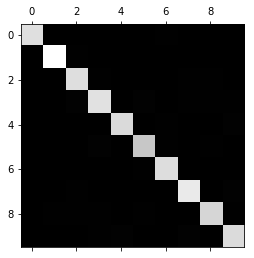

In [29]:
plt.matshow(cof_mat, cmap = plt.cm.gray)

We see that diagonals are white, it means tha the density of number of images is high at diagonals of confusion matrix

Let us now divide each no. by total images in their original classes

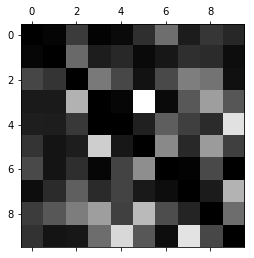

In [32]:
row_sums = np.sum(cof_mat,axis = 1)
row_sums = cof_mat/row_sums
#filling diagonals
np.fill_diagonal(row_sums,0)
plt.matshow(row_sums, cmap = plt.cm.gray)

From The figure, we draw the inferences that::

1.) 5 is often misclassified as 3 and 3 is ofter misclassified as 5, as those cells are white

2.) cells 0,1 and 2 are very dark. It means that almost all the images are rightly classified...

3.) columns 8 and 9 are bright,which shows that many images of different numbers are wrongly classified as 8 or 9

4.) rows 8 and 9 are bright again. It means that 8 and 9 are wrongly miscassified as other classes..

We can further develop new features ,like features representing number of loops in numnber , to find more patterns and improve accuracy and decrease error 

# Evaluating on Test set

In [38]:
scaled_test_data = scaler.transform(test_data)
best_model = grid_search.best_estimator_
test_pred = best_model.predict(scaled_test_data)
accuracy = np.sum(test_pred == test_label)/len(test_pred)
micro_precision = precision_score(test_label,test_pred, average = 'micro')
micro_recall = recall_score(test_label,test_pred, average = 'micro')
micro_f1_score = f1_score(test_label,test_pred, average = 'micro')

print('Accuracy',accuracy,'\nmicro_precision',micro_precision,'\nmicro_recall',micro_recall,'\nf1_score',micro_f1_score )

Accuracy 0.9758095238095238 
micro_precision 0.9758095238095238 
micro_recall 0.9758095238095238 
f1_score 0.9758095238095238


Wow!!...we have got an Accuracy of 97.5% with Neural Network for Handwritten Digit Recognition....That's an awesome score on test set...!!